# Random Forest:
Random forest is a **Bagging Base technique**.In this model the **Bagging base models** should be **Decision trees**. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
%matplotlib inline

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.215280,-0.407020,1.870433,-0.070000,-0.510674,1
1,0.725610,1.344599,2.085594,-0.153207,-0.301816,1
2,-1.762695,1.305453,-2.117962,0.219183,0.616225,0
3,-2.809079,-1.843391,2.547777,-2.131289,-0.800155,1
4,1.132881,0.785269,0.915802,3.024972,1.197640,1


In [4]:
# function for row sampling
import random
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-5-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-5-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-5-208d2966d7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col4', 'target'], dtype='object')
Index(['col1', 'col3', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')


In [11]:
df3

,col2,col5,target
2,1.305453,0.616225,0
28,1.534333,2.568398,0
94,1.158902,2.728472,1
75,0.627224,-0.138710,0
10,1.409688,1.324920,0
89,-1.288089,-3.976544,1
32,-3.093513,-0.632135,1
27,-1.246423,-5.458304,1
72,-0.233126,1.878248,0
39,1.087357,2.417621,0


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(167.4, 199.32, 'X[0] <= 0.054\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(111.6, 163.07999999999998, 'X[1] <= 1.45\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(66.96000000000001, 126.83999999999999, 'X[1] <= -2.014\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(44.64, 90.6, 'X[1] <= -2.304\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(22.32, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(89.28, 90.6, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(156.24, 126.83999999999999, 'X[0] <= -0.705\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(133.92000000000002, 90.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(178.56, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.2, 163.07999999999998, 'X[1] <= -0.179\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(200.88, 126.83999999999999, 'gini = 0.0\nsamples = 8\nvalue = [

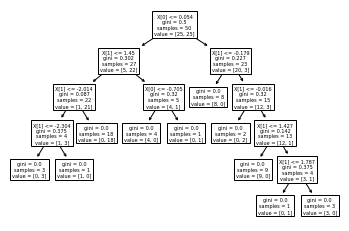

In [15]:
plot_tree(clf1)

[Text(167.4, 203.85, 'X[1] <= 0.235\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(55.800000000000004, 176.67000000000002, 'X[1] <= -1.745\ngini = 0.271\nsamples = 31\nvalue = [26, 5]'),
 Text(27.900000000000002, 149.49, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(83.7, 149.49, 'X[1] <= -1.676\ngini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(55.800000000000004, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 122.31, 'X[0] <= -1.422\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(83.7, 95.13, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(139.5, 95.13, 'X[0] <= -1.123\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(111.60000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(167.4, 67.94999999999999, 'X[1] <= -0.306\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(139.5, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(195.3, 40.77000000000001, 'X[1] <= -0.11\ngini = 0.5\n

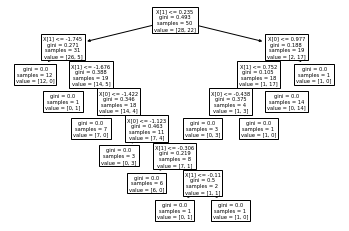

In [16]:
plot_tree(clf2)

[Text(145.37368421052633, 201.90857142857143, 'X[0] <= -0.238\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(70.48421052631579, 170.84571428571428, 'X[1] <= -3.375\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(35.242105263157896, 139.78285714285715, 'X[0] <= -1.24\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(17.621052631578948, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(52.863157894736844, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(105.72631578947369, 139.78285714285715, 'X[0] <= -1.844\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(88.10526315789474, 108.72, 'X[0] <= -1.958\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(70.48421052631579, 77.65714285714284, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(105.72631578947369, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(123.34736842105264, 108.72, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(220.26315789473685, 170.84571428571428, 'X[1] <= 2.

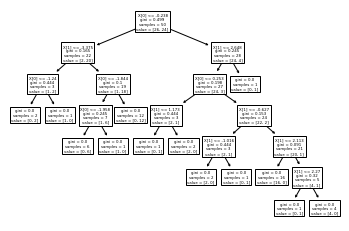

In [17]:
plot_tree(clf3)

In [18]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [19]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([0])

In [20]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
88,-1.126248,4.466187,-2.741983,-2.318377,2.051373,0
9,0.035550,2.440187,-0.801289,-0.357250,1.955404,0
35,-1.296389,0.153873,3.709583,-0.280212,0.467912,1
15,-0.591650,1.467321,-1.455041,1.061586,1.370480,0
87,0.836176,-1.970986,1.206404,4.132375,0.703067,0
96,0.592028,-1.269750,0.145033,0.837596,-1.346783,1
47,-0.803906,1.672469,-1.571166,-0.301996,0.154129,0
56,0.082322,-0.243383,2.390642,-0.344250,-1.519825,1
10,-2.467137,1.409688,-1.231768,1.376733,1.324920,0
14,-2.045057,-1.493095,0.863532,-1.471117,-0.889211,1
